# VizPool: A Python Library with Low-Code support for Basic to Advance Static & Interactive Visualizations

## Overview

Welcome to the getting started with VizPool; in this introduction to VizPooL, you learn how to use vizpool static API for creating static but complex visuals in one line of code.
In case you are looking for interactive visuals, please visit **[VizPool Interactive API](https://github.com/Hassi34/vizpool/blob/master/vizpool-InteractiveAPI.ipynb)**

## Introduction

In this notebook, you will learn how to perform EDA on **Tips dataset**. You will create quite complex visuals for the EDA process by simply calling a class method on instance of ``EDA`` class.

In the second section, we will see how to plot machine learning model evaluation metrics by simply calling the class methods on the instance of ``Evaluation`` class.

>This notebook is divided into 3 major sections which are as follows:

>   1. [Installations & Imports](#install-import)
>   2. [Exploratory Data Analysis (EDA)](#eda-)<br>
    a ) - [Pie Bar Chart](#pie-bar)<br>
    b ) - [Box Plot](#boxplot-)<br>
    c ) - [Count Plot](#countplot-)<br>
    d ) - [Histogram](#histogram-)<br>
    e ) - [Bar Chart](#barchart-)<br>
    f ) - [Violin Plot](#violinplot-)<br>
    g ) - [Correlation Heatmap](#corr-heatmap)<br>
    h ) - [Joint Plot](#jointplot-)<br>
    i ) - [Pair Plot](#pairplot-)<br>
>   3. [Model Evaluation](#model-eval)<br>
    a ) - [Confusion Matrix](#conf-mat)<br>
    b ) - [Feature Importance](#feat-imp)<br>
    c ) - [AUC ROC Plot](#auc-roc)<br>


## 1. Installations & Imports<a id='install-import'></a>

In [1]:
!pip install --upgrade --quiet vizpool 

In [2]:
#import IPython
#IPython.Application.instance().kernel.do_shutdown(True)

In [3]:
import dev.vizpool
dev.vizpool.__version__

'0.0.7'

In [4]:
from dev.vizpool.static import EDA
from dev.vizpool.static import Evaluation

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## 2. Exploratory Data Analysis (EDA)<a id='eda-'></a>

In [5]:
#load the dataset and create a pandas dataframe for analysis
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
# Instantiate the EDA class
tips_eda = EDA(df)

>**``Note``**: Every class method in **``VizPooL``** returns a ``plt object`` with can be stored in a variable to save or use the visual in any other application. refer to the following example;

### a. Pie Bar chart<a id='pie-bar'></a>

<Figure size 1800x600 with 0 Axes>

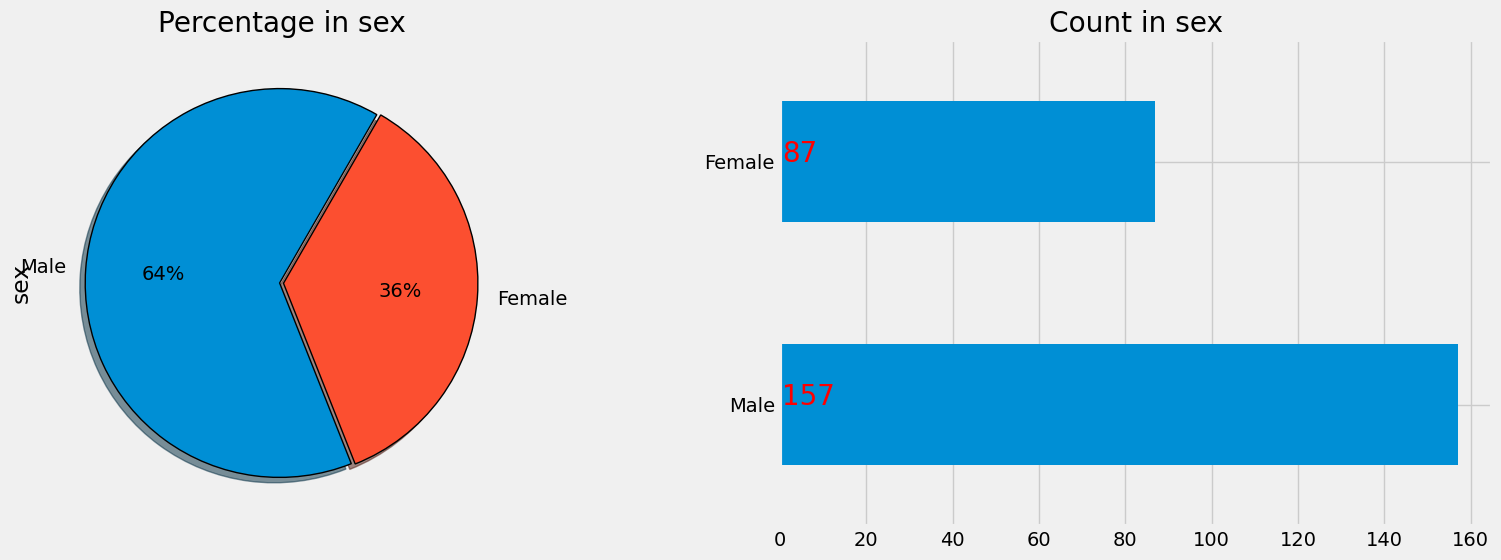

In [7]:
plt = tips_eda.pie_bar(hue='sex');
#plt.savefig("plot.png")

### b. Box Plot <a id='boxplot-'></a>

Boxplot grid of all the numerical columns

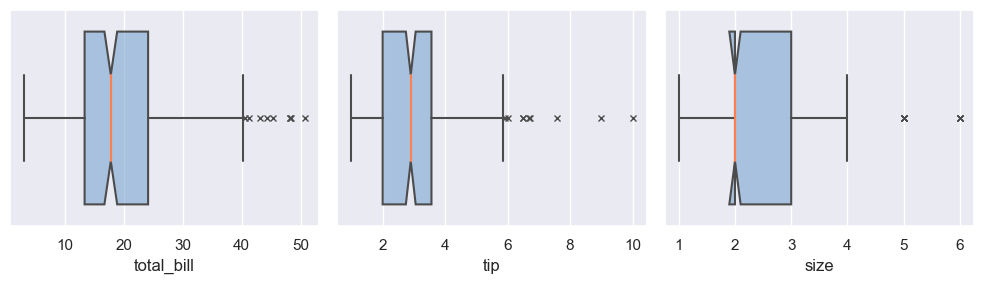

In [8]:
tips_eda.boxplot(height=3, width=10);

Boxplot grid for all numerical columns with hue specified 

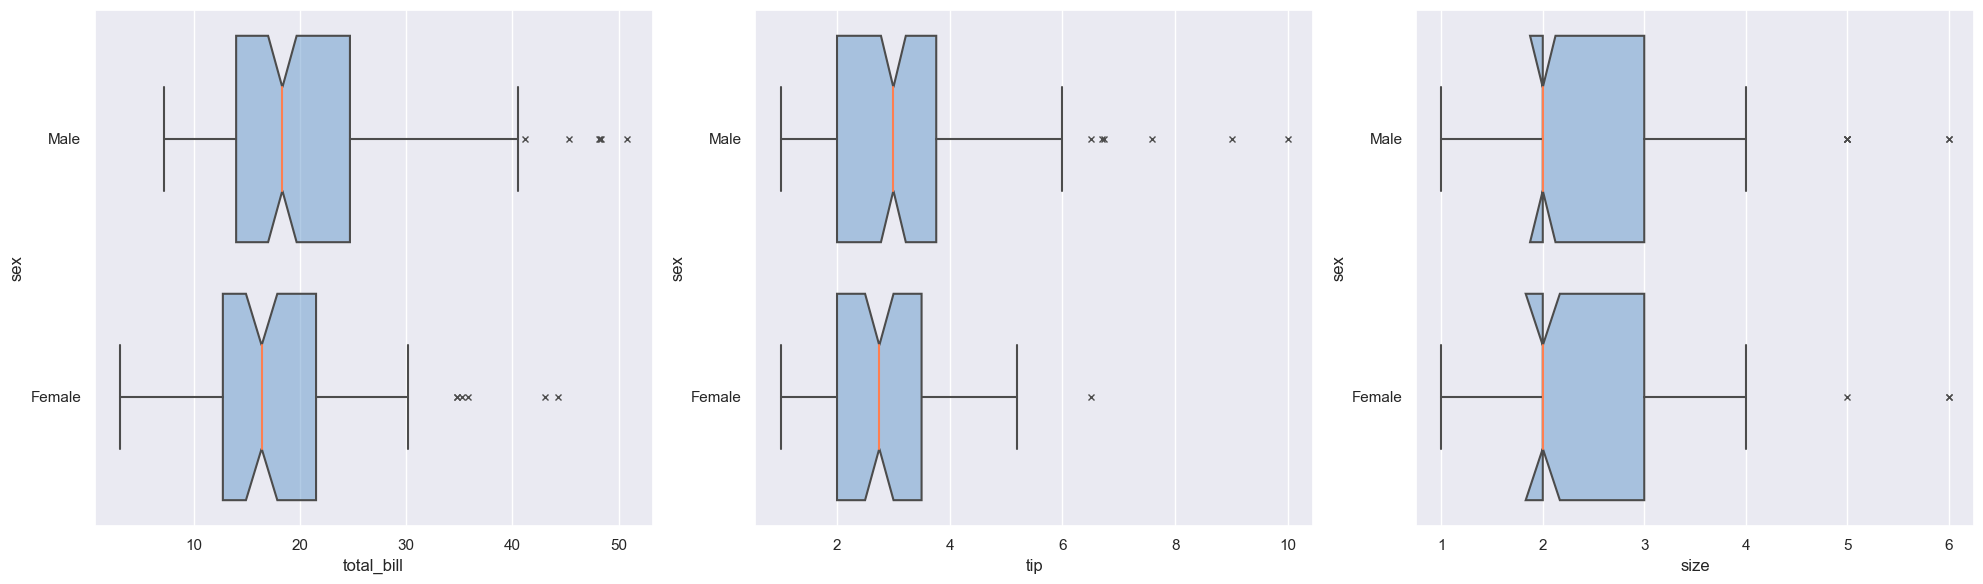

In [9]:
tips_eda.boxplot(hue='sex', height=6);

Boxplot for a specific numerical column

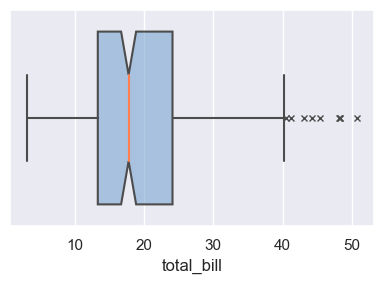

In [10]:
tips_eda.boxplot(col_to_plot=['total_bill'], width=4, height=3);

Boxplot of any numerical with hue specified

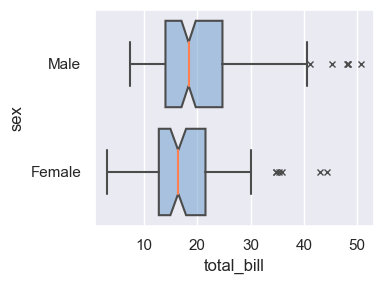

In [11]:
tips_eda.boxplot(col_to_plot=['total_bill'], hue='sex', width=4, height=3);

### c. Count Plot<a id='countplot-'></a>

Count plot grid of all the non-numeric columns in data

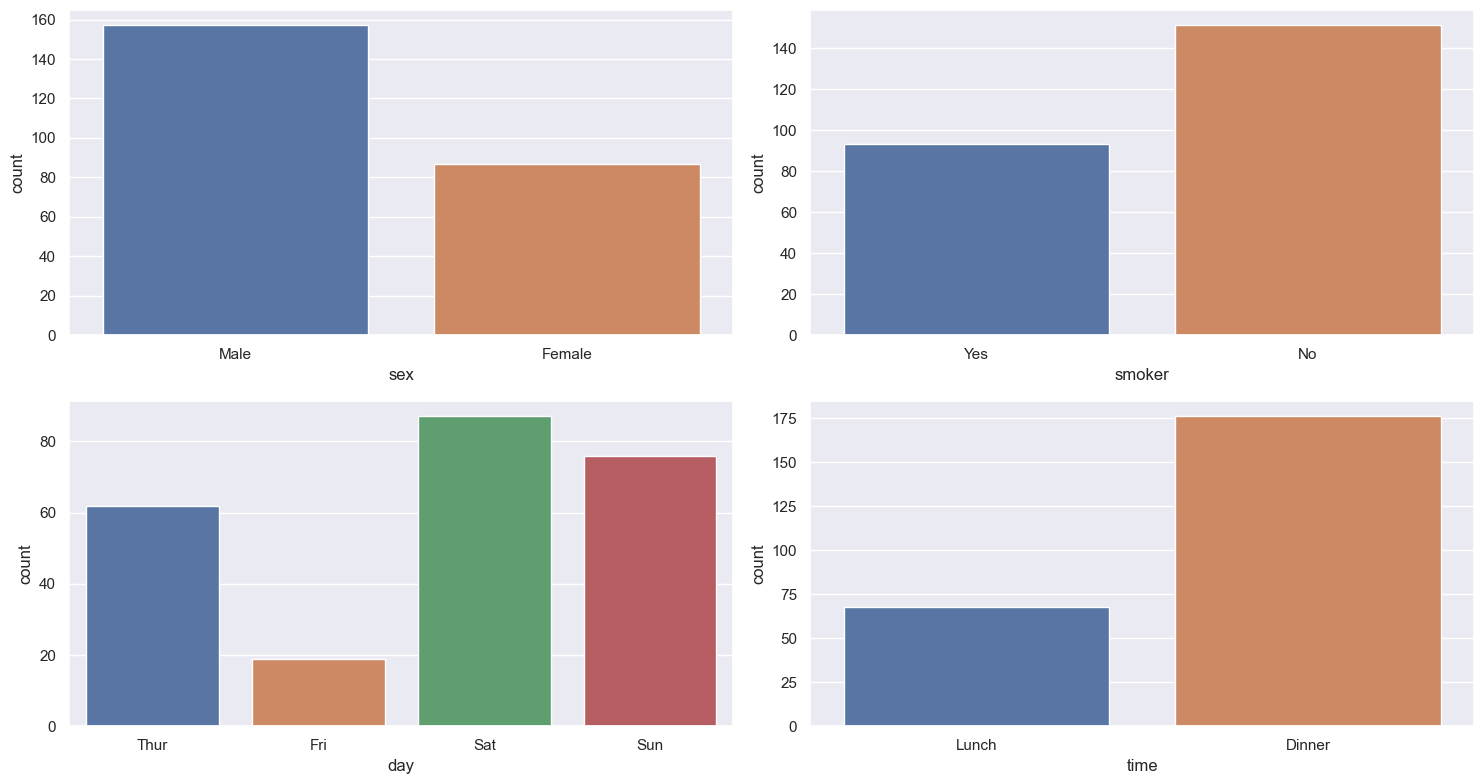

In [12]:
tips_eda.countplot();

Count plot of a single categorical column

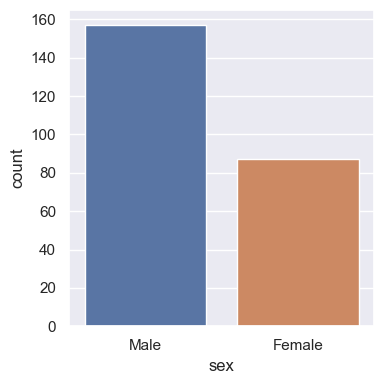

In [13]:
tips_eda.countplot(['sex'], height=4, width=4);

### d. Histogram<a id='histogram-'></a>

Histogram grid for all the numerical columns

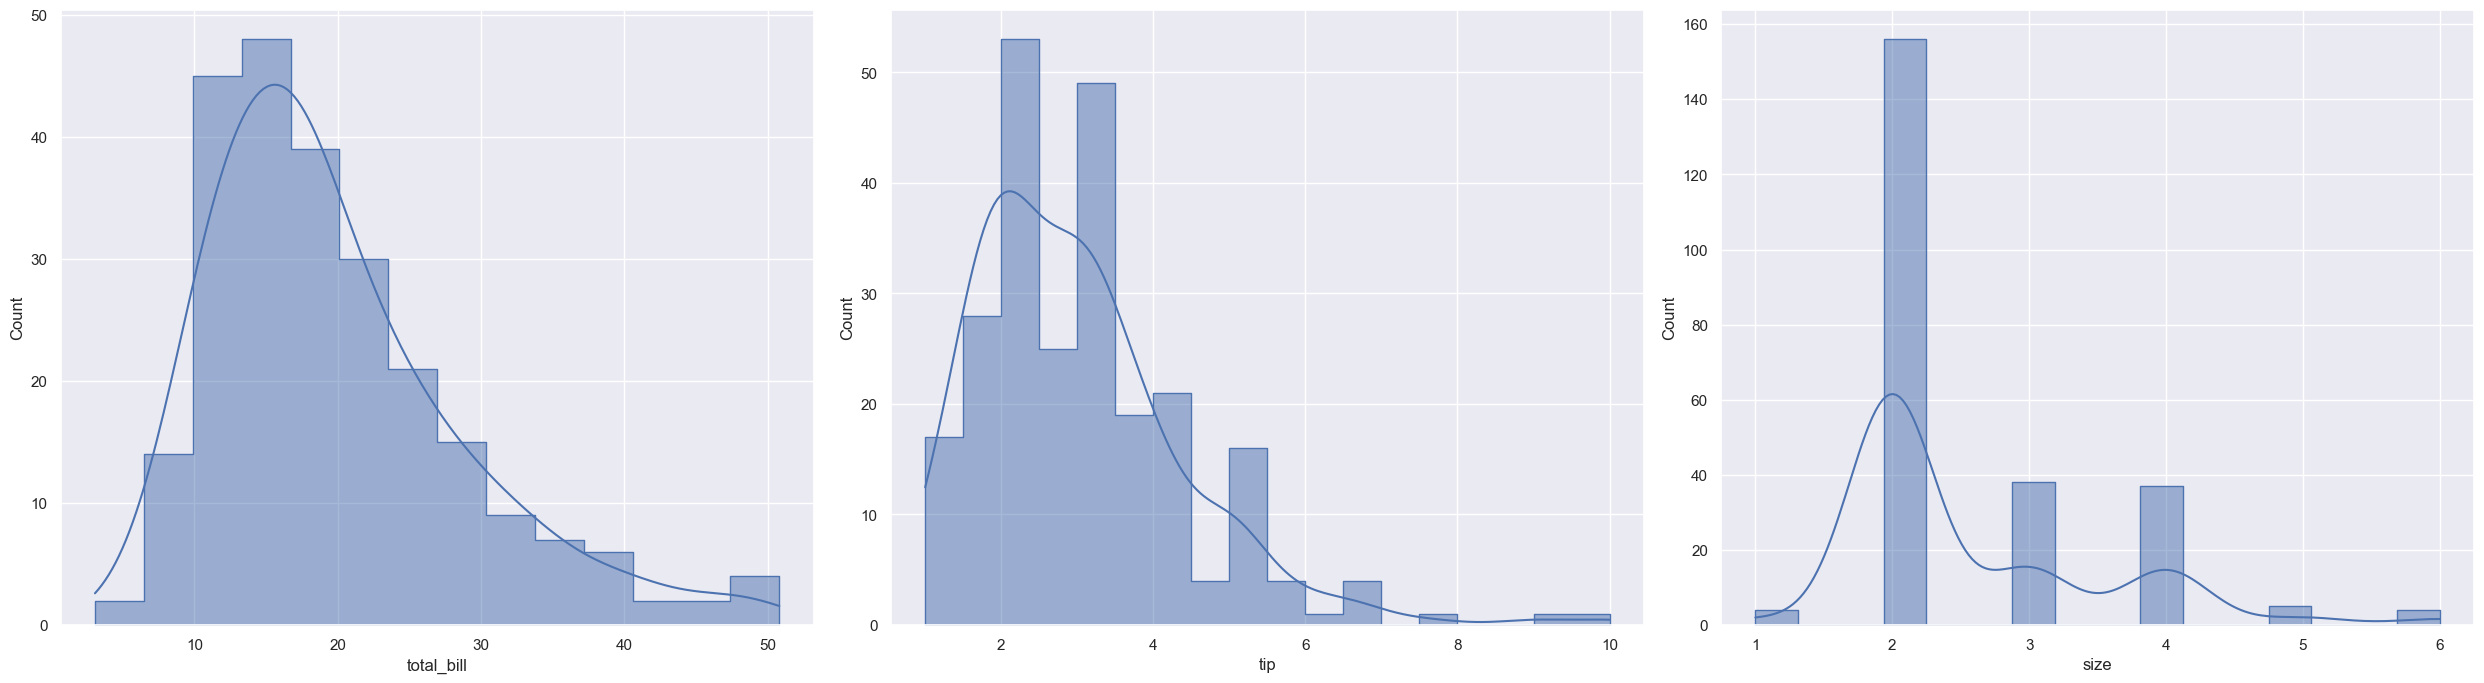

In [14]:
tips_eda.histogram(height=7);

Histogram with a categorical column being passed to hue as the keyword argument

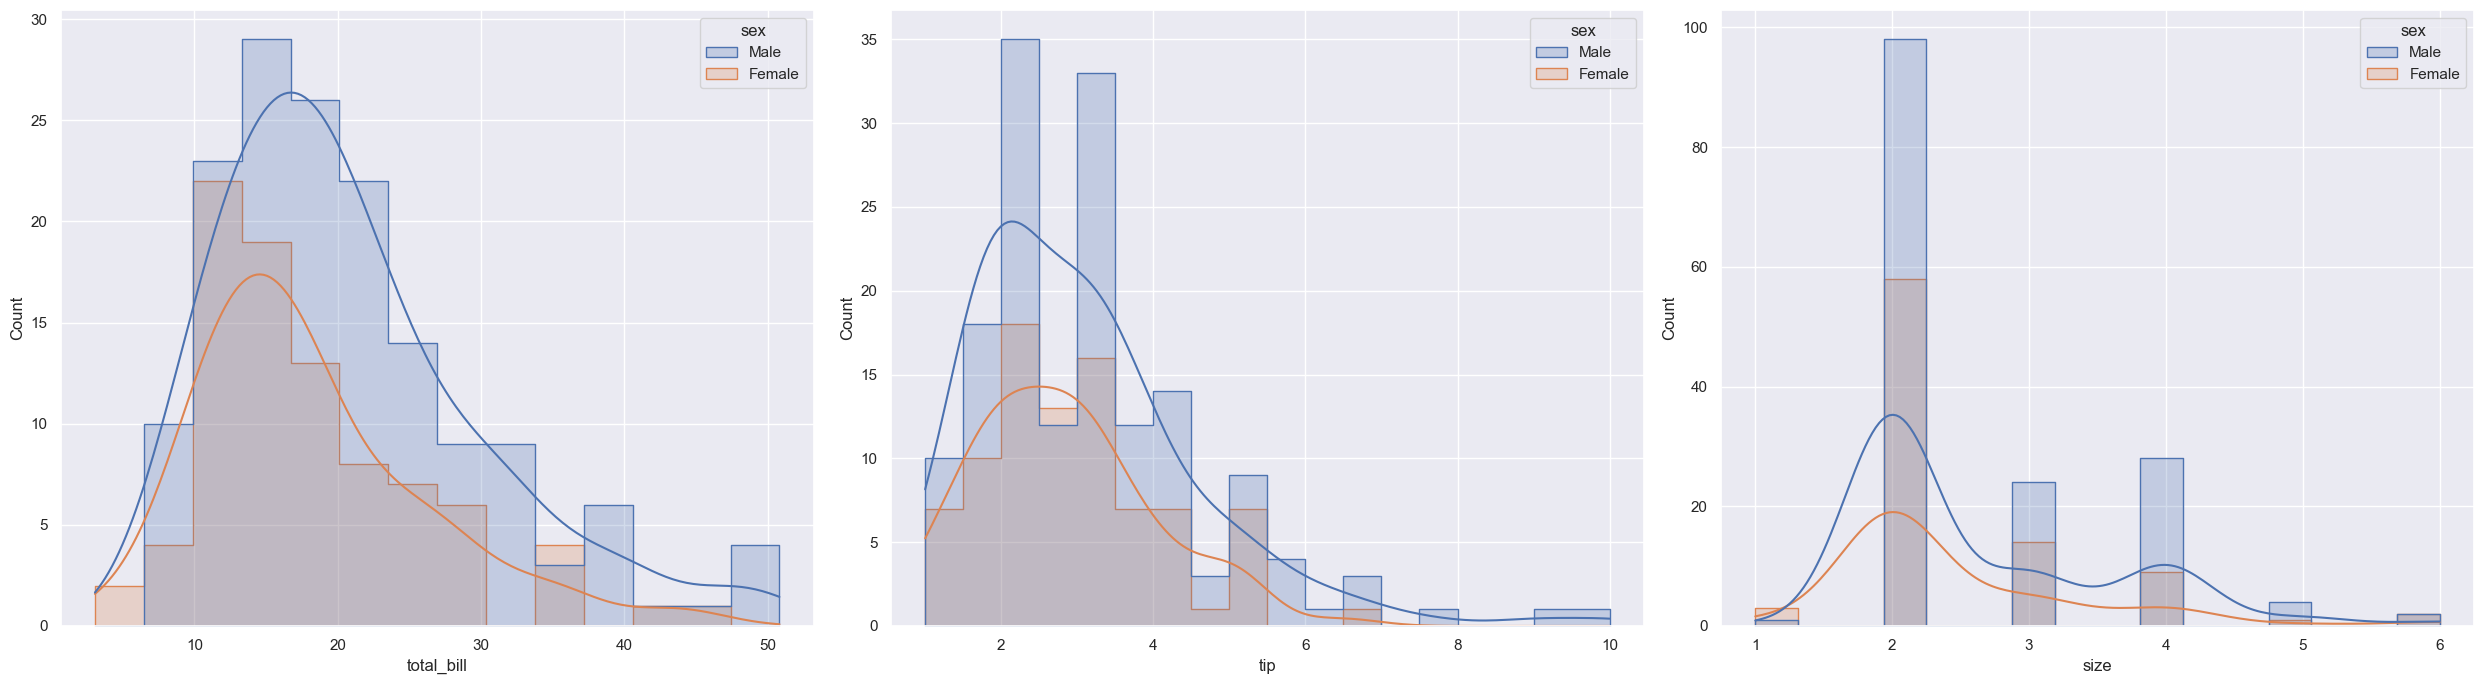

In [15]:
tips_eda.histogram(hue = 'sex', height=7);

histogram for a specific numerical column

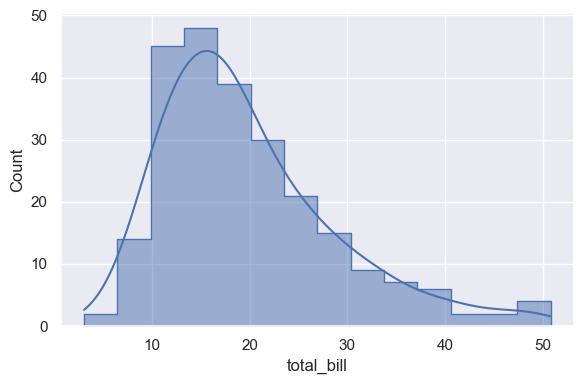

In [16]:
tips_eda.histogram(col_to_plot=['total_bill'], height=4, width=6);

Histogram for a specific numerical column with hue provided

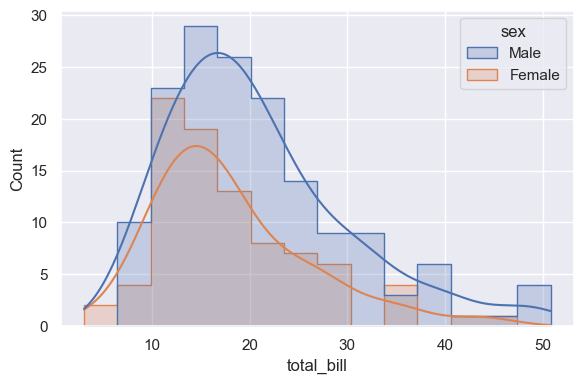

In [17]:
tips_eda.histogram(col_to_plot= ['total_bill'], hue = 'sex', height=4, width=6);

### e. Bar chart<a id='barchart-'></a>

Barchart grid of all the categorical columns against a provided numrical column<br>
``Note``: Keyword parameter, **estimator** could be any one of **(sum, mean, meadian, std, var)**. Default is set to **mean**

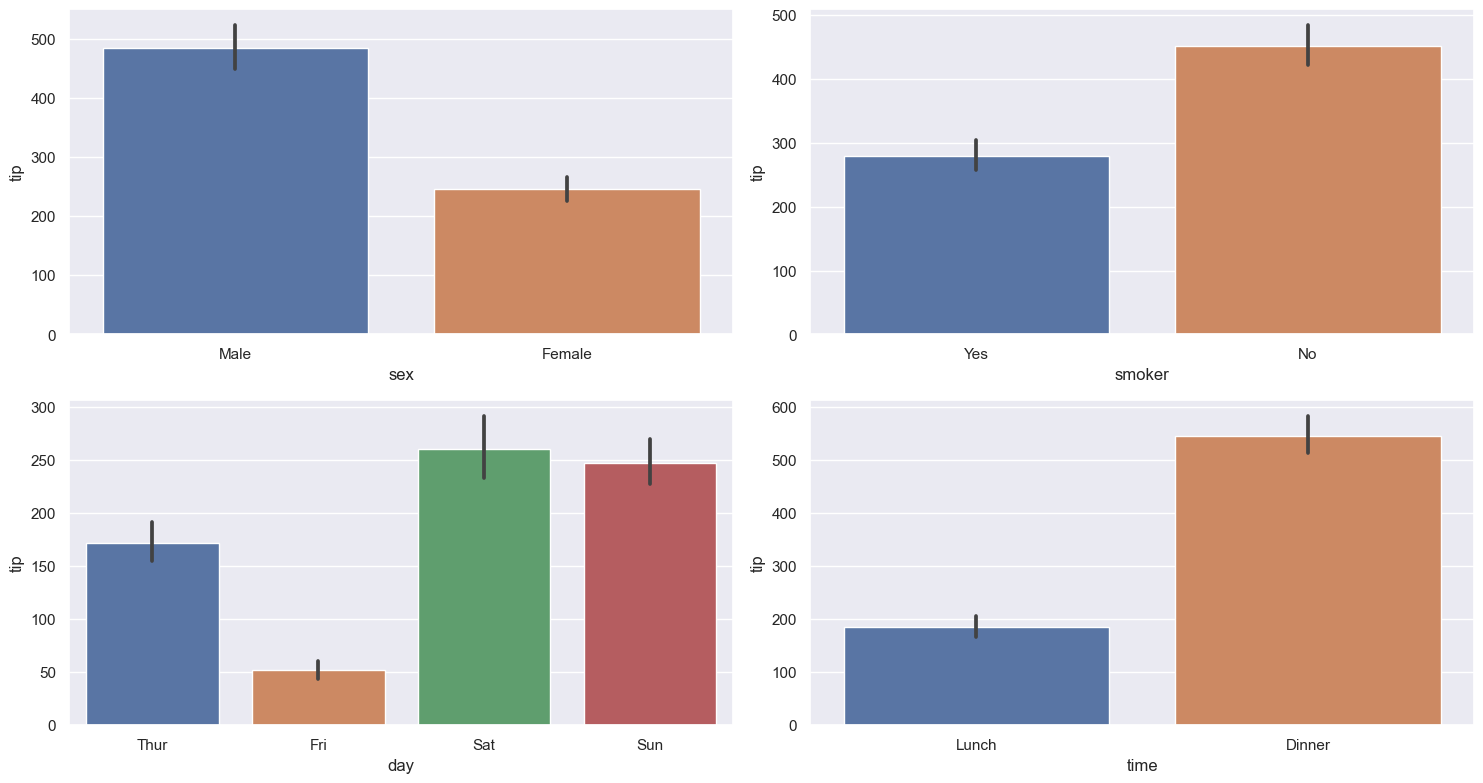

In [18]:
tips_eda.barplot(y='tip', estimator='sum');

Barchart grid of all the categorical columns against a provided numrical column with hue set to a categorical column

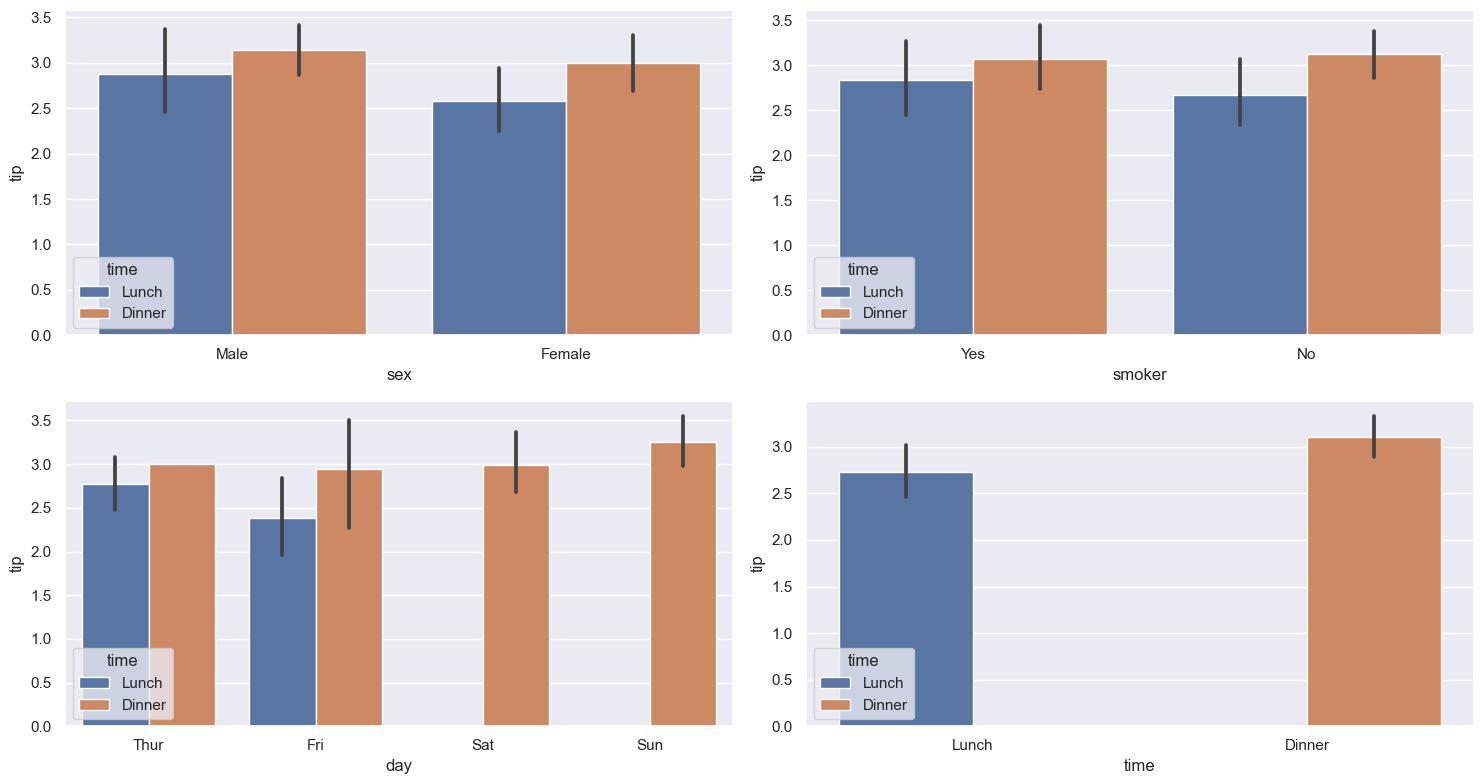

In [19]:
tips_eda.barplot(y='tip', hue='time').show() 

Barchart of single variable selected

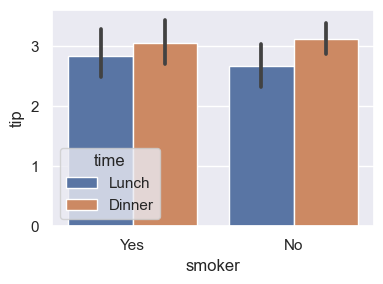

In [20]:
tips_eda.barplot(y='tip', col_to_plot='smoker', hue='time', height=3, width=4);

### f. Violin Plot<a id='violinplot-'></a>

Violinplot for all numerical columns against a target or categorical column pass as keyword argument

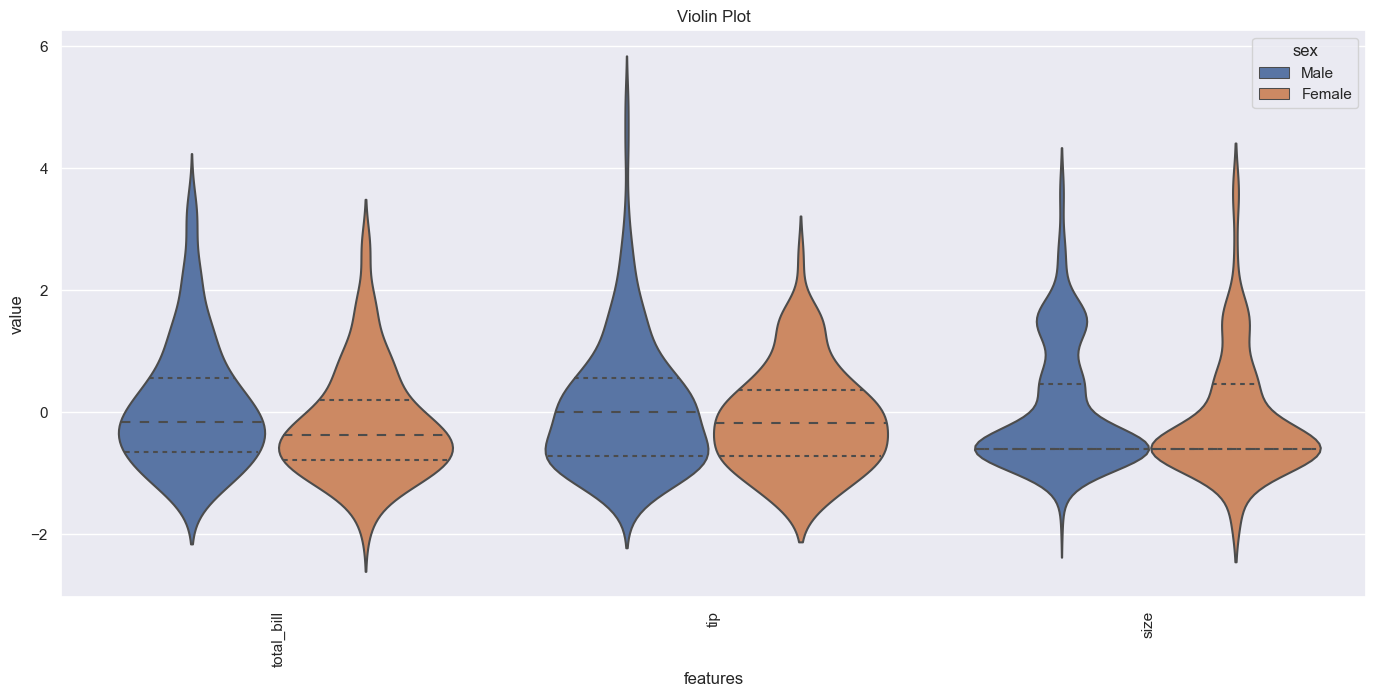

In [21]:
tips_eda.violinplot(hue='sex', height=7);

Violinplot for selective numerical columns against a target or categorical column pass as a keyword argument

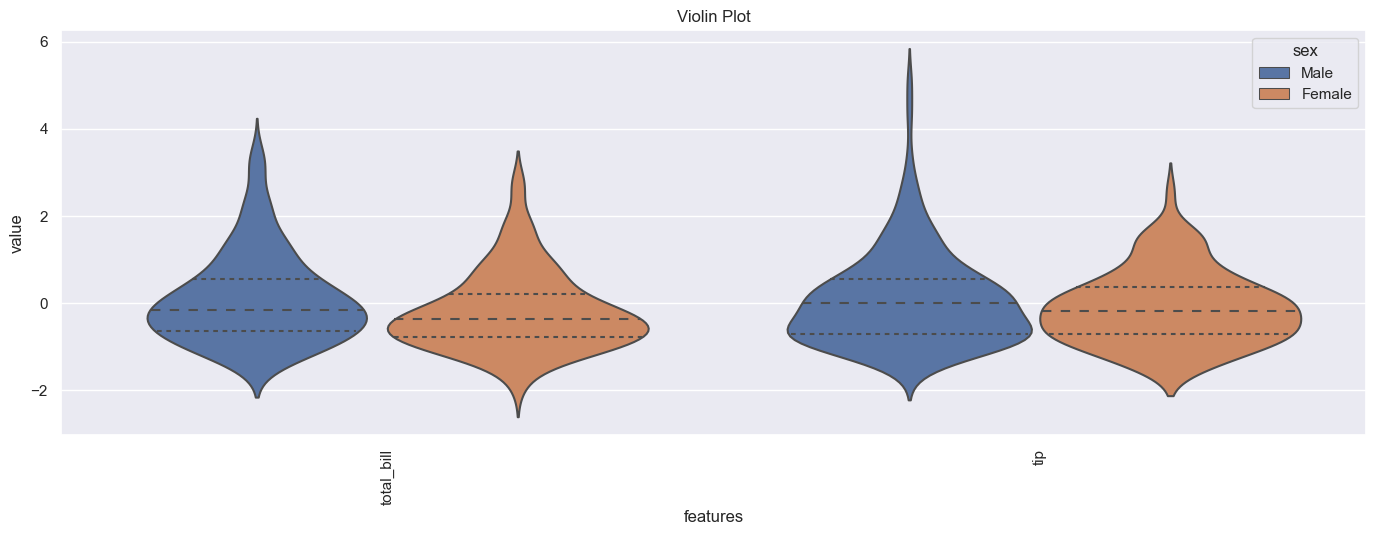

In [22]:
tips_eda.violinplot(col_to_plot= ['total_bill', 'tip'], hue='sex', height=5);

### g. Correlation Heatmap<a id='corr-heatmap'></a>

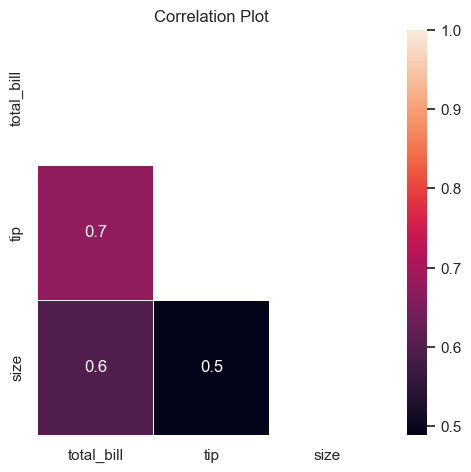

In [23]:
tips_eda.corr_heatmap(height=5, width=5);

### h. Joint Plot<a id='jointplot-'></a>

Jointplot of two numerical variables

<Figure size 500x500 with 0 Axes>

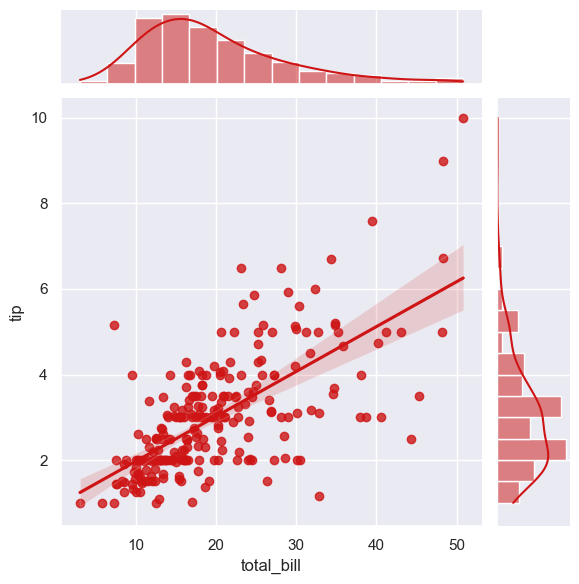

In [24]:
tips_eda.jointplot(var1='total_bill', var2='tip', height=5, width=5);

### i. Pair Plot<a id='pairplot-'></a>

Pairplot of all the numerical features with a categorical column being passed as a keyword argument

<Figure size 800x500 with 0 Axes>

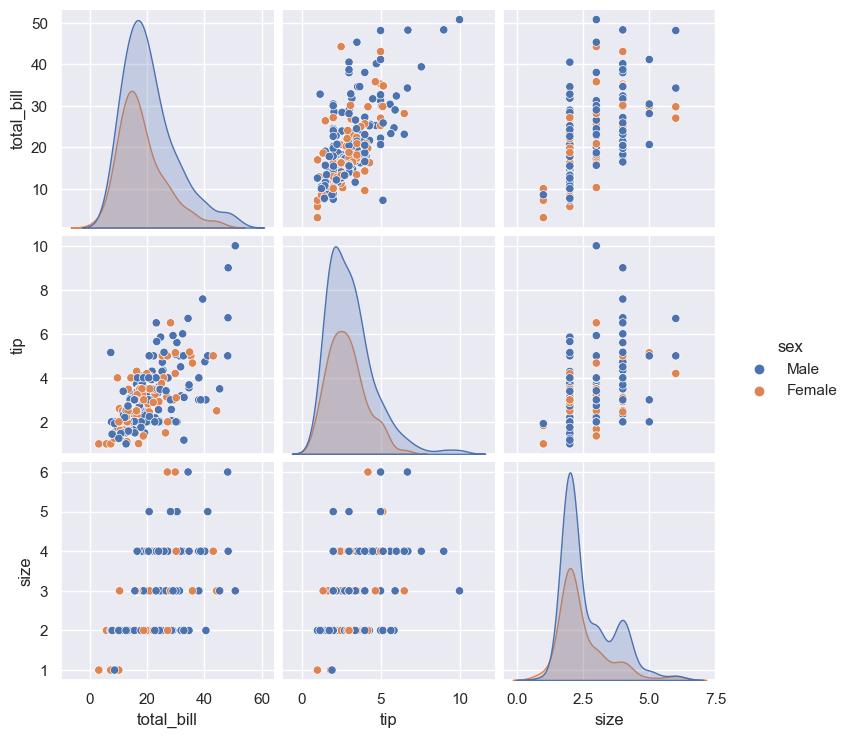

In [25]:
tips_eda.pairplot(hue='sex', height=5, width=8);

## 3. Model Training & Evaluation<a id='model-eval'></a>

**Note** : This notebook is not focused on model training process so we will NOT deep dive into that as this section is focused on how to visualize and evaluate model performace using vizpool static API 

In [26]:
# Lets select some columns and try to predict if person is smoker or not 
df = df[["total_bill", "tip", "size", "smoker"]]
target_class_labels = df['smoker'].unique().tolist()
target = LabelEncoder().fit_transform(df.pop('smoker'))
X_train, X_val, y_train, y_val = train_test_split(df, target, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

logistic_reg_clf = LogisticRegression()
logistic_reg_clf.fit(X_train, y_train)
logistic_predictions = logistic_reg_clf.predict(X_val)

etc = ExtraTreeClassifier()
etc.fit(X_train, y_train)
etc_predictions = etc.predict(X_val)

svc = SVC(probability=True)
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_val)

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_predictions = sgd.predict(X_val)

In [27]:
# Instantiate Evaluation class
model_eval = Evaluation(y_val)

### a. Confusion Matrix<a id='conf-mat'></a>

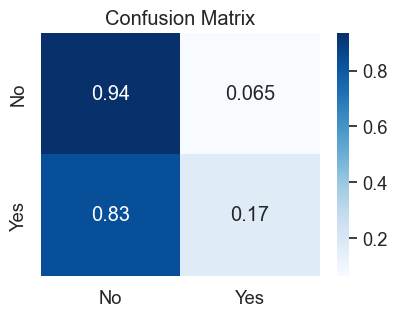

In [28]:
# Confusion matrix with ratios
model_eval.confusion_matrix(logistic_predictions, 
                            target_names=target_class_labels,
                            height=3, width=4);

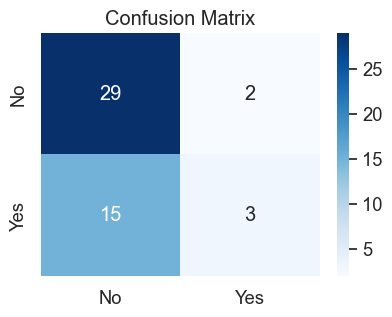

In [29]:
# Confusion matrix with Count
model_eval.confusion_matrix(logistic_predictions, target_names=target_class_labels,
                            height=3, width=4, normalize = False);

### b. Feature Importace<a id='feat-imp'></a>

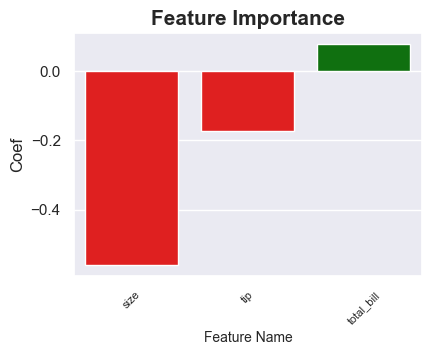

In [30]:
model_eval.feature_importance(logistic_reg_clf, X_train, y_train, 
                              height=3, width = 4);

### c. AUC ROC Plot<a id='auc-roc'></a>

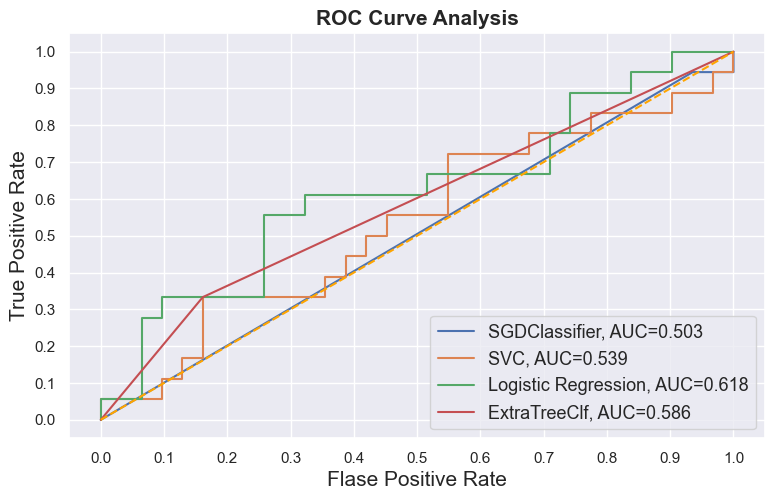

In [31]:
model_eval.auc_roc_plot(X_val, [sgd, svc, logistic_reg_clf, etc],
                        ['SGDClassifier', 'SVC', 'Logistic Regression', 'ExtraTreeClf'],
                        height=5, width = 8);

End of Notebook


**Copyright &copy; 2022 Hasanain** <br><br>
**[My LinkdIn](https://www.linkedin.com/in/hasanain-mehmood-a37a4116b/)** <br>
**[My GitHub](https://github.com/Hassi34)**
